# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [2]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [3]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [5]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [6]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [7]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [8]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [9]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [10]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [11]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [12]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [13]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [14]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

54

In [16]:
data = data.drop_duplicates()

**Задание 15. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [17]:
data['education'] = data['education'].str.lower()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [18]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [19]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [20]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [21]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [22]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

## Исследуйте данные и ответьте на вопросы

**Задание 19. Есть ли зависимость между количеством детей и возвратом кредита в срок?**

   children  count   sum       res
5         5      9     0  0.000000
0         0  14107  1063  7.535266
3         3    330    27  8.181818
1         1   4809   444  9.232689
2         2   2052   194  9.454191
4         4     41     4  9.756098
   children      debt
0         5  0.000000
1         0  0.075353
2         3  0.081818
3         1  0.092327
4         2  0.094542
5         4  0.097561
       children  debt
3979          5     0
4397          5     0
7866          5     0
15822         5     0
15916         5     0
16211         5     0
20452         5     0
20837         5     0
21156         5     0


Text(0, 0.5, 'Процент наличия долгов')

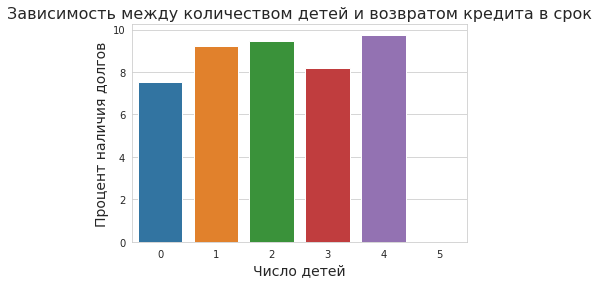

In [23]:
'''Cгруппировали заемщиков по количеству детей, сосчитали количество по группам 
и количество имеющих долги по группам, высчитали процент должников по группам'''
debt_children = data.groupby('children')['debt'].agg(['count','sum'])
debt_children = debt_children.assign(res=debt_children['sum'] / debt_children['count'] *100).reset_index() 
print(debt_children.sort_values('res'))
# Второй способ
debt_children_1 = pd.pivot_table(data=data, index=['children'], values=['debt']).sort_values('debt').reset_index()
print(debt_children_1)

#подтвердили парадоксальные данные о том, что заемщики с пятью детьми не имеют долгов
data_debt = data.loc[(data['children'] == 5)]   
print(data_debt[['children', 'debt']]) 

import seaborn
import matplotlib.pyplot as plt

seaborn.set_style("whitegrid")
seaborn.barplot(data=debt_children, x='children', y='res')
plt.title('Зависимость между количеством детей и возвратом кредита в срок', fontsize=16)
plt.xlabel('Число детей', fontsize=14)
plt.ylabel('Процент наличия долгов', fontsize=14)


 ***Вывод:***  Имеется зависимость просрочек по уплате долга в зависимости от наличия и количества детей.

 - Бездетные заемщики реже допускают просрочки по кредитам - 7,5%
 - С увеличением количества детей наблюдается рост просроченных задолженностей от 9,2% у заемщиков с одним ребенком до 9,7% - с четырьмя детьми.
 - Заемщики с 3 детьми чаще платят в срок, чем люди с 1 ребенком.
 - Заемщики с пятью детьми вообще не допускают просрочек.
 * * * * *
 Возможно, нужна большая выборка, чем та, которую мы имеем или парадоксальные данные объясняются, например, мерами соцподдержки семей с пятью детьми.

**Задание 20. Есть ли зависимость между семейным положением и возвратом кредита в срок?**

In [24]:
print(data.head())

   children  days_employed  dob_years education  education_id  \
0         1    8437.673028         42    высшее             0   
1         1    4024.803754         36   среднее             1   
2         0    5623.422610         33   среднее             1   
3         3    4124.747207         32   среднее             1   
4         0  340266.072047         53   среднее             1   

      family_status  family_status_id gender income_type  debt  total_income  \
0   женат / замужем                 0      F   сотрудник     0        253875   
1   женат / замужем                 0      F   сотрудник     0        112080   
2   женат / замужем                 0      M   сотрудник     0        145885   
3   женат / замужем                 0      M   сотрудник     0        267628   
4  гражданский брак                 1      F   пенсионер     0        158616   

                      purpose total_income_category          purpose_category  
0               покупка жилья                   

           family_status  count  sum       res
2         вдовец / вдова    951   63  6.624606
1              в разводе   1189   84  7.064760
4        женат / замужем  12266  927  7.557476
3       гражданский брак   4146  385  9.286059
0  Не женат / не замужем   2796  273  9.763948
           family_status      debt
0         вдовец / вдова  0.066246
1              в разводе  0.070648
2        женат / замужем  0.075575
3       гражданский брак  0.092861
4  Не женат / не замужем  0.097639


Text(0, 0.5, 'Процент наличия долгов')

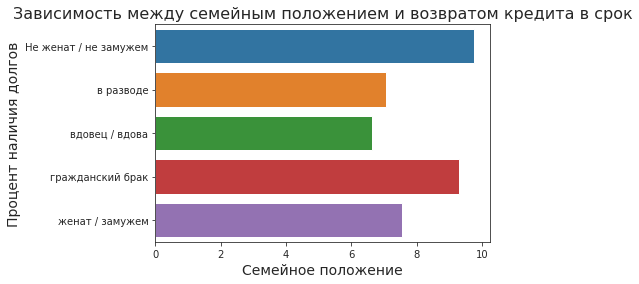

In [25]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.

fam_status_debt = data.groupby(['family_status'])['debt'].agg(['count','sum'])
fam_status_debt = fam_status_debt.assign(res=fam_status_debt['sum'] / fam_status_debt['count'] * 100).reset_index() 
print(fam_status_debt.sort_values('res'))
# Второй способ
fam_status_debt_1 = pd.pivot_table(data=data,
               index=['family_status'],
               values=['debt']).sort_values('debt').reset_index()
print(fam_status_debt_1)


seaborn.set_style("ticks")
seaborn.barplot(data=fam_status_debt, x='res', y='family_status')
plt.title('Зависимость между семейным положением и возвратом кредита в срок', fontsize=16)
plt.xlabel('Семейное положение', fontsize=14)
plt.ylabel('Процент наличия долгов', fontsize=14)

__Вывод:__
_Имеется зависимость между семейным положением и возвратом кредита в срок_

Люди, не состоящие в браке и состоящие в гражданском браке чаще допускают просрочки по кредитам:
___9,8%___ у не состоящих в браке, ___9,3%___ у состоящих в гражданском браке против ___7,6%___ у состоящих в браке.
- - - 

Возможно, данные о разведенных и потерявших супруга связаны с различиями в возрасте этих групп заемщиков и неженатых.

**Задание 21. Есть ли зависимость между уровнем дохода и возвратом кредита в срок?**

  total_income_category  count   sum       res
3                     D    349    21  6.017192
1                     B   5014   354  7.060231
0                     A     25     2  8.000000
2                     C  15938  1353  8.489145
4                     E     22     2  9.090909
  total_income_category      debt
0                     D  0.060172
1                     B  0.070602
2                     A  0.080000
3                     C  0.084891
4                     E  0.090909


Text(-8.825000000000003, 0.5, 'Число заемщиков')

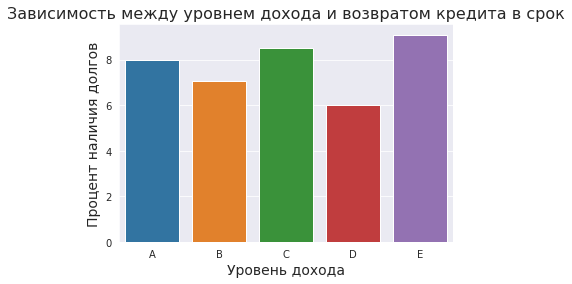

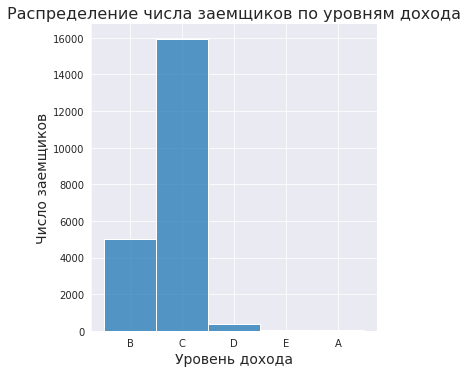

In [26]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
total_incom_category_debt = data.groupby(['total_income_category'])['debt'].agg(['count','sum'])
total_incom_category_debt = total_incom_category_debt.assign(res=total_incom_category_debt['sum'] / total_incom_category_debt['count'] * 100).reset_index() 
print(total_incom_category_debt.sort_values('res'))
# Второй способ
total_incom_category_debt_1 = pd.pivot_table(data=data,
               index=['total_income_category'],
               values=['debt']).sort_values('debt').reset_index()
print(total_incom_category_debt_1)


seaborn.set_style("darkgrid")
seaborn.barplot(data=total_incom_category_debt, x='total_income_category', y='res')
plt.title('Зависимость между уровнем дохода и возвратом кредита в срок', fontsize=16)
plt.xlabel('Уровень дохода', fontsize=14)
plt.ylabel('Процент наличия долгов', fontsize=14)

seaborn.displot(data['total_income_category'])
plt.title('Распределение числа заемщиков по уровням дохода', fontsize=16)
plt.xlabel('Уровень дохода', fontsize=14)
plt.ylabel('Число заемщиков', fontsize=14)


**Вывод:** Зависимость не выявлена  
В имеющейся выборке представлены в основном заемщики со средним уровнем дохода (категории В и С). Прочие категории представлены недостаточно. Данные в категориях с минимальным и максимальным доходом практически одинаковы. 

**Задание 22. Как разные цели кредита влияют на его возврат в срок?**

           purpose_category  count  sum       res
1  операции с недвижимостью  10754  780  7.253115
3        проведение свадьбы   2324  183  7.874355
2     получение образования   3989  369  9.250439
0    операции с автомобилем   4281  400  9.343611
           purpose_category      debt
0  операции с недвижимостью  0.072531
1        проведение свадьбы  0.078744
2     получение образования  0.092504
3    операции с автомобилем  0.093436


Text(0, 0.5, 'Процент наличия долгов')

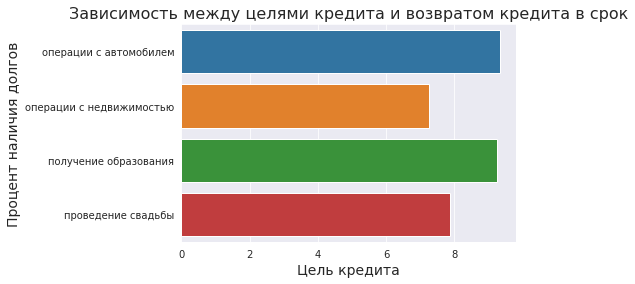

In [27]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
purpose_debt = data.groupby(['purpose_category'])['debt'].agg(['count','sum'])
purpose_debt = purpose_debt.assign(res=purpose_debt['sum'] / purpose_debt['count'] * 100).reset_index() 
print(purpose_debt.sort_values('res'))
# Второй способ
purpose_debt_1 = pd.pivot_table(data=data,
               index=['purpose_category'],
               values=['debt']).sort_values('debt').reset_index()
print(purpose_debt_1)


seaborn.set_style("darkgrid")
seaborn.barplot(data=purpose_debt, x='res', y='purpose_category')
plt.title('Зависимость между целями кредита и возвратом кредита в срок', fontsize=16)
plt.xlabel('Цель кредита', fontsize=14)
plt.ylabel('Процент наличия долгов', fontsize=14)


**Вывод:**   
Наиболее частыми причнами просрочки являются кредит на образование и кредит на покупку автомобиля.
Реже всего просрочки по кредитам на операции с недвижимостью, число которых превосходит остальные причины кредитования в приблизительно 2-5 раз.

**Задание 23. Приведите возможные причины появления пропусков в исходных данных.**

In [28]:
try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

print(data.isna().sum())
print('Количество строк, содержащих пропуски в обоих столбцах', len(data.loc[data['days_employed'].isna() & data['total_income'].isna()]))


children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64
Количество строк, содержащих пропуски в обоих столбцах 2174


***Ответ:***     
Пропущенные данные встречаются в двух столбцах: `days_employed`, `total_income`.  
Все пропуски находятся в одних и тех же строках.  
На основании этого можно предположить, что при слиянии данных были допущены ошибки. Например, столбцы в одной из таблиц имели другие названия.


**Задание 24. Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.**

***Ответ:***   
*Медиана* – значение, которое делит отсортированные по возрастанию данные на две равные части. При помощи этого метода можно нивелировать распределение данных, отличающееся от нормального. Например, при смещении влево.

## Общий вывод.

***При анализе данных выявлены следующие закономерности просрочек по уплате долга:***
1. Имеется зависимость  от наличия и количества детей - бездетные реже допускают просрочки по кредиту.
2. Имеется зависимость от семейного положения - женатые/замужние реже допускают просрочки по кредиту. Самый высокий процент просрочек по кредиту в группе неженатых/незамужних и состоящих в гражданском браке людей. Возможно, это вызвано различиями в возрасте заемщиков.
3. Не выявлена зависимость от уровня дохода. Скорее всего, это вызвано тем, что в выборке большинство данных о заемщиках со средним доходом.
4. Имеется зависимость от цели кредитования. Реже всего должники встречаются в группе заемщиков, планирующих потратить кредит на операции с недвижимостью.


<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>Новый общий вывод:</b></u></font>
    <br />
    <font color='4682B4'>Было проведено исследование, чтобы выявить влияние разных факторов на пограшение кредита в срок. Входные данные - статистика о платежеспособности клиентов. Результаты исследования будут учтены при построении модели кредитного скоринга - специальной системы, которая оценивает сособность потенциального заемщика вернуть долг банку.   
    <br />   <br />  
    Перед проведением исследования были поставлены несколько гипотез:<br />
    - <b>Гипотеза 1</b> количество детей влияет на факт погашения кредита в срок;<br />
    - <b>Гиптеза 2</b> семейное положение влияет на факт погашения кредита в срок;<br />
    - <b>Гипотеза 3</b> уровень дохода влияет на факт погашения кредита в срок;<br />
    - <b>Гипотеза 4</b> цель кредита влияет на факт погашения кредита в срок.<br /> <br />
    В результате удалось выявить зависимости.<br /> <br />
    <u><b>Гипотеза 1 частично подтверждена:</u></b> для более точных выводов необходимо больше данных по клиентам с 3, 4 и 5 детьми: <br /> <br />
            - 7,5% - доля просроченных кредитов у бездетных заемщиков;<br />
            - 9,2% - доля просроченных кредитов у заемщиков с 1 ребенком;<br />
            - 9,4% - доля просроченных кредитов у заемщиков с 2 детьми.<br /> <br />
    <i>Рекомендация:</i> провести дополнительное исследование на большей выборке данных. <br /><br />
    <u><b>Гипотеза 2 подтверждена:</u></b><br /> 
        - у неженатых клиентов - 9,7% и тех, у кого брак официально не зарегистрирован - 9,2% выше вероятность стать должником;<br />
        - те, кто в разводе - 7,1%, женат/замужем - 7,5% или вдовец/вдова - 6,6% менее вероятно становятся должниками.<br /><br />
     <i>Рекомендация:</i> разница между между пунктами списка невелика - всего 3,1%, поэтому я не рекомендовала бы наделять этой зависимости высокий вес при принятии решения о кредитоспособности. <br /><br />   
     <u><b>Гипотеза 3 частично подтверждена:</u></b> для более точных выводов необходимо больше данных по клиентам с уровнем дохода категории Е (до 30 000 руб.), D (от 30 001 до 50 000 руб.) и А (от 1 000 001 руб.). <br /> 
            - 7,1% доля просроченных кредитов у клиентов с уровнем дохода  от 50 001  до 200 000 руб. <br /> 
            - 8,5% доля просроченных кредитов у клиентов с уровнем дохода  от 200 001  до 1 000 000 руб. <br /> 
    <i>Рекомендация:</i> провести дополнительное исследование на большей выборке данных. <br /><br />
    <u><b>Гипотеза 4 подтверждена:</u></b><br /> 
        - 7,2% доля просроченных кредитов, целью которых были операции с недвижимостью;<br />
        - 7,9% доля просроченных кредитов, целью которых было проведение свадьбы;<br />
        - 9,2% доля просроченных кредитов, целью которых было получение образования;<br />
        - 9,3% доля просроченных кредитов, целью которых были операции с автомобилем.<br /><br />
    <i>Рекомендация:</i> разница между между пунктами списка невелика - всего 2,1%, поэтому я не рекомендовала бы наделять этой зависимости высокий вес при принятии решения о кредитоспособности. <br /><br />
    <font color='4682B4'><u><b>Общие рекомендации:</b></u></font>
    <br />  
    1. Специалистам, которые занимаются построением модели кредитного скоринга, можно использовать зависимости из второй и четвертой гипотезы (семейное положение и цели кредита); <br />
    2. Необходимо собрать более полную выборку для повторной проверки первой и третьей гипотез.    
    
            
            
            
   
</div>